In [1]:
import leukemiadrugscreen as leukdev
import matplotlib.pyplot as plt
import numpy as np
from drugfit import Hill
from matplotlib.gridspec import GridSpec
import ternary
import seaborn as sns
import pandas as pd

ModuleNotFoundError: No module named 'leukemiadrugscreen'

In [ ]:
foldername = "DVP_Rep1"
stack = leukdev.DeviceStack.from_folder(foldername)

In [ ]:
d12_point = (0.5, 0.5, 0)
d13_point = (0.5, 0, 0.5)
d23_point = (0, 0.5, 0.5)

region12 = leukdev.Region.from_point(d12_point, stack)
region13 = leukdev.Region.from_point(d13_point, stack)
region23 = leukdev.Region.from_point(d23_point, stack)


d123_point = (1/3, 1/3, 1/3)
region123 = leukdev.Region.from_point(d123_point, stack)

# Plotting scripts

C:\Users\Dan\AppData\Local\Temp\ipykernel_15640\3153414434.py:22: UserWarning:

This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.

c:\Users\Dan\Dropbox (GaTech)\Projects\Drug Screening Device\drug-screening-device\leukemiadrugscreen.py:503: RuntimeWarning:

invalid value encountered in true_divide

c:\Users\Dan\Dropbox (GaTech)\Projects\Drug Screening Device\drug-screening-device\leukemiadrugscreen.py:505: RuntimeWarning:

invalid value encountered in true_divide

c:\Users\Dan\Dropbox (GaTech)\Projects\Drug Screening Device\drug-screening-device\leukemiadrugscreen.py:503: RuntimeWarning:

invalid value encountered in true_divide

c:\Users\Dan\Dropbox (GaTech)\Projects\Drug Screening Device\drug-screening-device\leukemiadrugscreen.py:505: RuntimeWarning:

invalid value encountered in true_divide

c:\Users\Dan\Dropbox (GaTech)\Projects\Drug Screening Device\drug-screening-device\leukemiadrugscreen.py

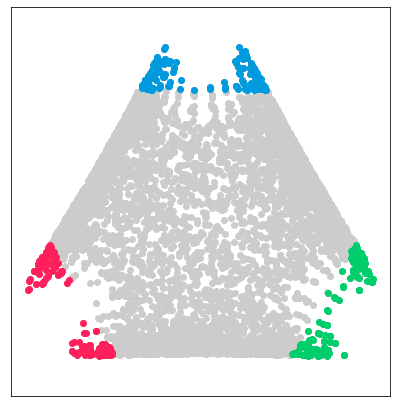

In [ ]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout = True, figsize = (6, 6))

colors = ["#ff1f5b", "#00cd6c", "#009ade", "#af58ba", "#ffc61e", "#f28522", "#a0b1ba", "#a6761d"]
ax1 = fig.add_subplot()

def plot_tern_bg(zone, ax, color):
    ternx, terny = leukdev.terncoords(zone.device.dataTable[["c1", "c2", "c3"]])
    ternx_sel, terny_sel = leukdev.terncoords(zone.cells[["c1", "c2", "c3"]])
    ax.scatter(ternx, terny, c = color) 

def plot_zone_tern(zone, ax, color):
    ternx, terny = leukdev.terncoords(zone.device.dataTable[["c1", "c2", "c3"]])
    ternx_sel, terny_sel = leukdev.terncoords(zone.cells[["c1", "c2", "c3"]])
    #ax.scatter(ternx, terny, c = '0.8')
    ax.scatter(ternx_sel, terny_sel, c = color)

fig.tight_layout()
ax1.axis("equal")
plot_tern_bg(stack.singledrugregions[0].zones[0], ax1, "0.8")

plot_zone_tern(stack.singledrugregions[0].zones[0], ax1, colors[0])
plot_zone_tern(stack.singledrugregions[1].zones[0], ax1, colors[1])
plot_zone_tern(stack.singledrugregions[2].zones[0], ax1, colors[2])

#plot_zone_tern(region12.zones[0], ax1, colors[3])
#plot_zone_tern(region13.zones[0], ax1, colors[4])
#plot_zone_tern(region23.zones[0], ax1, colors[5])

#plot_zone_tern(region123.zones[0], ax1, colors[6])

ax1.set_xticks([])
ax1.set_yticks([])

# plot single drug fits
def plot_single_drug(drug_idx, ax, color):
    y = stack.singledrugfits[drug_idx-1].y
    x = stack.singledrugfits[drug_idx-1].x
    hillfit = stack.singledrugfits[drug_idx-1]
    xplot = np.linspace(0, max(x), 100)
    yplot = hillfit.E(xplot)
    ax.scatter(x, y, c = color)
    ax.plot(xplot, yplot, c = color)
    ax.set_ylim(0, 1)
    ax.text(max(x)-max(x)/4, 0.8+0.05, stack.drug_names[drug_idx-1])
    ax.text(max(x)-max(x)/4, 0.65+0.05, f"EC50: {hillfit.C:.2f}")
    ax.text(max(x)-max(x)/4, 0.5+0.05, f"Emax: {hillfit.Emax:.2f}")
    ax.text(max(x)-max(x)/4, 0.5-0.10, f"hill: {hillfit.h:.2f}")
    ax.set_xlabel("Concentration")
    ax.set_ylabel("Viability")

plt.show()


#format_axes(fig)


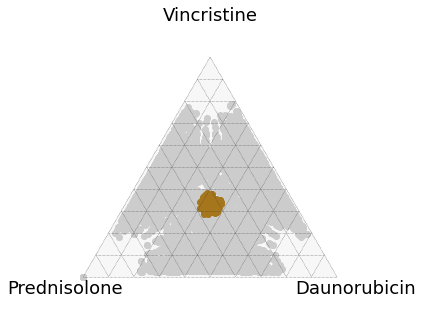

In [ ]:
fig, tax = ternary.figure()
fig.set_dpi = 150
fig.set_size_inches(5,5)

def zip_ternpoints(region):
    coords = region.zones[1].cells[["c1", "c2", "c3"]]
    ternpoints = list(coords.itertuples(index = False, name = None))
    return ternpoints

def bg_ternpoints(region):
    coords = region.zones[1].device.dataTable[["c1", "c2", "c3"]]
    ternpoints = list(coords.itertuples(index = False, name = None))
    return ternpoints


tax.ax.axis("equal")
tax.gridlines(color = "0.2", multiple = 0.1)

tax.scatter(bg_ternpoints(region23), c = "0.8")



#tax.scatter(zip_ternpoints(stack.singledrugregions[0]), c = colors[0])
#tax.scatter(zip_ternpoints(stack.singledrugregions[1]), c = colors[1])
#tax.scatter(zip_ternpoints(stack.singledrugregions[2]), c = colors[2])


#tax.scatter(zip_ternpoints(region12), c = colors[3])
#tax.scatter(zip_ternpoints(region13), c = colors[4])
#tax.scatter(zip_ternpoints(region23), c = colors[5])

tax.scatter(zip_ternpoints(region123), c = colors[7])

fontsize = 18
tax.right_corner_label(stack.drug_names[0], fontsize = fontsize)
tax.top_corner_label(stack.drug_names[1], fontsize = fontsize)
tax.left_corner_label(stack.drug_names[2], fontsize = fontsize)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.show()


In [ ]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout = True, figsize = (6, 6))

colors = ["#ff1f5b", "#00cd6c", "#009ade", "#af58ba", "#ffc61e", "#f28522", "#a0b1ba", "#a6761d"]
ax1 = fig.add_subplot()

def plot_tern_bg(zone, ax, color):
    ternx, terny = leukdev.terncoords(zone.device.dataTable[["c1", "c2", "c3"]])
    ternx_sel, terny_sel = leukdev.terncoords(zone.cells[["c1", "c2", "c3"]])
    ax.scatter(ternx, terny, c = color) 

def plot_zone_tern(zone, ax, color):
    ternx, terny = leukdev.terncoords(zone.device.dataTable[["c1", "c2", "c3"]])
    ternx_sel, terny_sel = leukdev.terncoords(zone.cells[["c1", "c2", "c3"]])
    #ax.scatter(ternx, terny, c = '0.8')
    ax.scatter(ternx_sel, terny_sel, c = color)

fig.tight_layout()
ax1.axis("equal")
plot_tern_bg(stack.singledrugregions[0].zones[0], ax1, "0.8")

#plot_zone_tern(stack.singledrugregions[0].zones[0], ax1, colors[0])
#plot_zone_tern(stack.singledrugregions[1].zones[0], ax1, colors[1])
#plot_zone_tern(stack.singledrugregions[2].zones[0], ax1, colors[2])

plot_zone_tern(region12.zones[0], ax1, "y")
plot_zone_tern(region13.zones[0], ax1, "m")
plot_zone_tern(region23.zones[0], ax1, "c")

#plot_zone_tern(region123.zones[0], ax1, colors[6])

ax1.set_xticks([])
ax1.set_yticks([])

# plot single drug fits
def plot_single_drug(drug_idx, ax, color):
    y = stack.singledrugfits[drug_idx-1].y
    x = stack.singledrugfits[drug_idx-1].x
    hillfit = stack.singledrugfits[drug_idx-1]
    xplot = np.linspace(0, max(x), 100)
    yplot = hillfit.E(xplot)
    ax.scatter(x, y, c = color)
    ax.plot(xplot, yplot, c = color)
    ax.set_ylim(0, 1)
    ax.text(max(x)-max(x)/4, 0.8+0.05, stack.drug_names[drug_idx-1])
    ax.text(max(x)-max(x)/4, 0.65+0.05, f"EC50: {hillfit.C:.2f}")
    ax.text(max(x)-max(x)/4, 0.5+0.05, f"Emax: {hillfit.Emax:.2f}")
    ax.text(max(x)-max(x)/4, 0.5-0.10, f"hill: {hillfit.h:.2f}")
    ax.set_xlabel("Concentration")
    ax.set_ylabel("Viability")

plt.show()


#format_axes(fig)


NameError: name 'plt' is not defined

(0.0, 1.0)

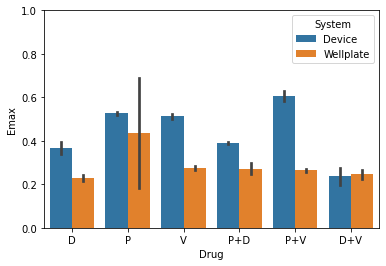

In [ ]:
# barplot drug data
EC50_data = pd.read_excel("DevicevsWellplate_2.xlsx", "Sheet1", skiprows = 2, nrows = 7, usecols = "B:G")
EC50_data.rename(columns = {"Unnamed: 1": "Drugs"}, inplace = True)


data = pd.read_csv("devicevswellplate_tidy.csv")


ax1 = sns.barplot(data = data[data["Drug"] != "D+P+V"], x = "Drug", y = "Emax", hue = "System", errorbar = "se")
ax1.set_ylim(0, 1)

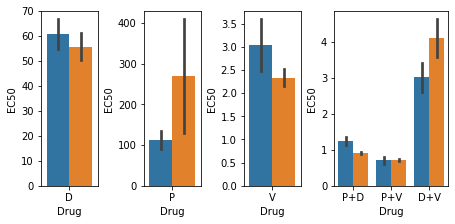

In [ ]:
fig = plt.figure(figsize = (7, 3), constrained_layout = True)
gs = GridSpec(1, 6, figure = fig)
ax2 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[0, 2])
ax5 = fig.add_subplot(gs[0, 3:5])

sns.barplot(ax = ax2, data = data[data["Drug"] == "D"], x = "Drug", y = "EC50", hue = "System", errorbar = "se")
ax2.legend([], [], frameon=False)
sns.barplot(ax = ax3, data = data[data["Drug"] == "P"], x = "Drug", y = "EC50", hue = "System", errorbar = "se")
ax3.legend([], [], frameon=False)
sns.barplot(ax = ax4, data = data[data["Drug"] == "V"], x = "Drug", y = "EC50", hue = "System", errorbar = "se")
ax4.legend([], [], frameon=False)
sns.barplot(ax = ax5, data = data[(data["Drug"] != "D") & (data["Drug"] != "V") & (data["Drug"] != "P") & (data["Drug"] != "D+P+V")], x = "Drug", y = "EC50", hue = "System", errorbar = "se")
ax5.legend([], [], frameon=False)



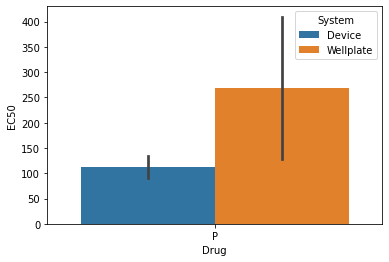

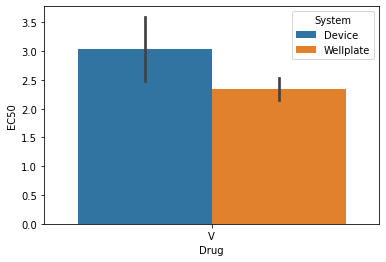

In [ ]:
ax4 = sns.barplot(data = data[data["Drug"] == "V"], x = "Drug", y = "EC50", hue = "System", errorbar = "se")

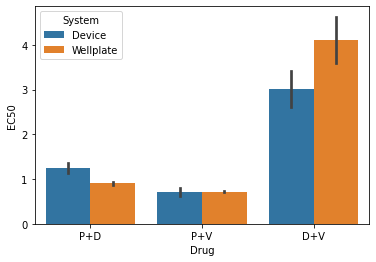

In [ ]:
ax5 = sns.barplot(data = data[(data["Drug"] != "D") & (data["Drug"] != "V") & (data["Drug"] != "P") & (data["Drug"] != "D+P+V")], x = "Drug", y = "EC50", hue = "System", errorbar = "se")